Exercises

1. Plot the rolling 20-day minimum of the Facebook closing price with the pandas plot() method.

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fb = pd.read_csv('fb_stock_prices_2018.csv', index_col = 'date', parse_dates = True)
fb.head()

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903
2018-01-03,181.88,184.78,181.3300,184.67,16886563
2018-01-04,184.90,186.21,184.0996,184.33,13880896
2018-01-05,185.59,186.90,184.9300,186.85,13574535
2018-01-08,187.20,188.90,186.3300,188.28,17994726


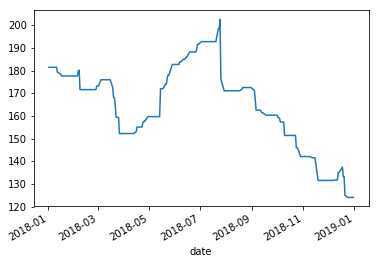

In [70]:
fb.close.rolling('20D').min().plot()

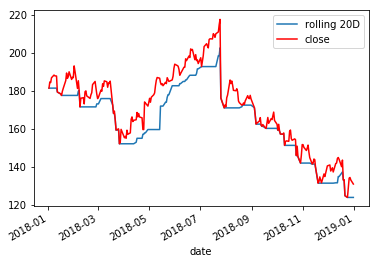

In [71]:
ax = fb.close.rolling('20D').min().plot(label = 'rolling 20D', legend = True)
fb.close.plot(
    ax=ax, kind='line', color='red',
    label = 'close',
    legend = True
)

2. Create a histogram and KDE of the change from open to close in the price of Facebook stock.

In [75]:
fb = fb.assign(change = fb.open - fb.close)

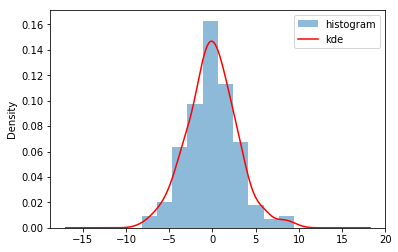

In [76]:
ax = fb.change.plot(kind = 'hist', label = 'histogram', density=True, alpha=0.5, legend = True)

fb.change.plot(
    ax=ax, kind='kde', color='red',
    label = 'kde',
    legend = True
)

3. Using the earthquake data, create box plots for the magnitudes of each
magType used in Indonesia.

In [78]:
earth = pd.read_csv('earthquakes.csv')
earth.head()

,mag,magType,time,place,tsunami,parsed_place
0,1.35,ml,1539475168010,"9km NE of Aguanga, CA",0,California
1,1.29,ml,1539475129610,"9km NE of Aguanga, CA",0,California
2,3.42,ml,1539475062610,"8km NE of Aguanga, CA",0,California
3,0.44,ml,1539474978070,"9km NE of Aguanga, CA",0,California
4,2.16,md,1539474716050,"10km NW of Avenal, CA",0,California


Text(0, 0.5, 'magnitude')

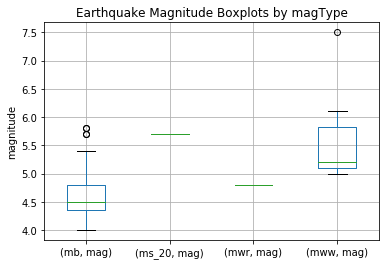

In [79]:
earth[earth.parsed_place == 'Indonesia'][['mag', 'magType']].groupby('magType').boxplot(subplots = False)
plt.title('Earthquake Magnitude Boxplots by magType')
plt.ylabel('magnitude')

mb            AxesSubplot(0.1,0.15;0.173913x0.75)
ms_20    AxesSubplot(0.308696,0.15;0.173913x0.75)
mwr      AxesSubplot(0.517391,0.15;0.173913x0.75)
mww      AxesSubplot(0.726087,0.15;0.173913x0.75)
dtype: object

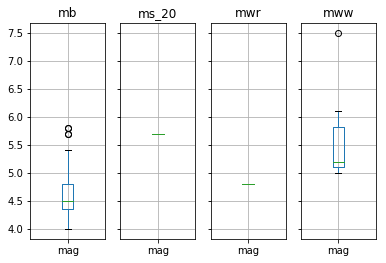

In [85]:
indo = earth.query('parsed_place == "Indonesia"')
indo[['mag', 'magType']].groupby('magType').boxplot(subplots = True, layout = [1,4])

4. Make a line plot of the difference between the weekly maximum high price
and the weekly minimum low price for Facebook. This should be a single
line.

In [90]:
weekly = fb.groupby(pd.Grouper(freq = '1W')).agg({
    'high': 'max',
    'low': 'min'
})
weekly = weekly.assign(weekly_diff = weekly.high - weekly.low)

In [91]:
weekly.head()

,high,low,weekly_diff
date,,,
2018-01-07,186.90,177.55,9.35
2018-01-14,188.90,177.40,11.50
2018-01-21,182.37,175.80,6.57
2018-01-28,190.66,180.41,10.25
2018-02-04,195.32,181.84,13.48


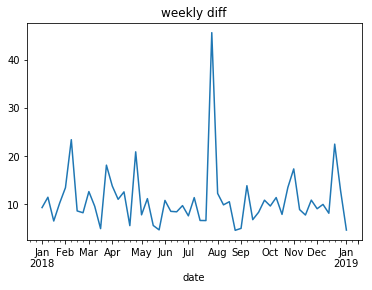

In [92]:
weekly.weekly_diff.plot(title = 'weekly diff')